In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Generation of Dataset

In [2]:
N = 20

# generate random data between -5 and 5
X = np.random.random(N) * 10 -5

# a line with noise
Y = 0.5*X -1 + np.random.randn(N)

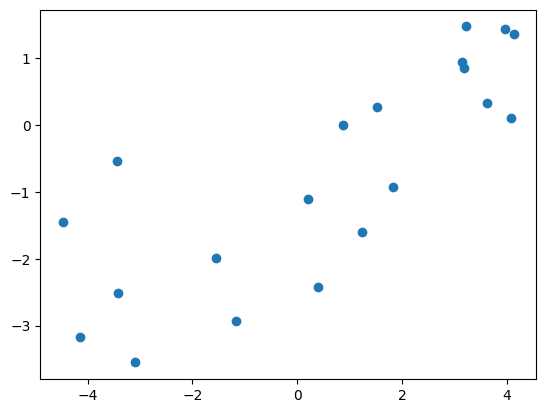

In [3]:
plt.scatter(X,Y)

In [4]:
# creating the linear model

# one input and one output
model = nn.Linear(1,1)

In [5]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [6]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [7]:
# pytorch uses float32 by default
# numpy uses float64 by default

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

## Train the model

In [8]:
n_epochs = 30
losses = []

for i in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    output = model(inputs)
    loss = criterion(output,targets)
    
    # append in loss for plot
    losses.append(loss.item())
    
    # backward and optimize
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {i+1}/{n_epochs}, Loss:{loss.item():.4f}')
    

Epoch 1/30, Loss:2.6576
Epoch 2/30, Loss:1.9167
Epoch 3/30, Loss:1.4876
Epoch 4/30, Loss:1.2392
Epoch 5/30, Loss:1.0953
Epoch 6/30, Loss:1.0120
Epoch 7/30, Loss:0.9637
Epoch 8/30, Loss:0.9358
Epoch 9/30, Loss:0.9196
Epoch 10/30, Loss:0.9102
Epoch 11/30, Loss:0.9048
Epoch 12/30, Loss:0.9017
Epoch 13/30, Loss:0.8998
Epoch 14/30, Loss:0.8988
Epoch 15/30, Loss:0.8982
Epoch 16/30, Loss:0.8978
Epoch 17/30, Loss:0.8976
Epoch 18/30, Loss:0.8975
Epoch 19/30, Loss:0.8974
Epoch 20/30, Loss:0.8974
Epoch 21/30, Loss:0.8974
Epoch 22/30, Loss:0.8973
Epoch 23/30, Loss:0.8973
Epoch 24/30, Loss:0.8973
Epoch 25/30, Loss:0.8973
Epoch 26/30, Loss:0.8973
Epoch 27/30, Loss:0.8973
Epoch 28/30, Loss:0.8973
Epoch 29/30, Loss:0.8973
Epoch 30/30, Loss:0.8973


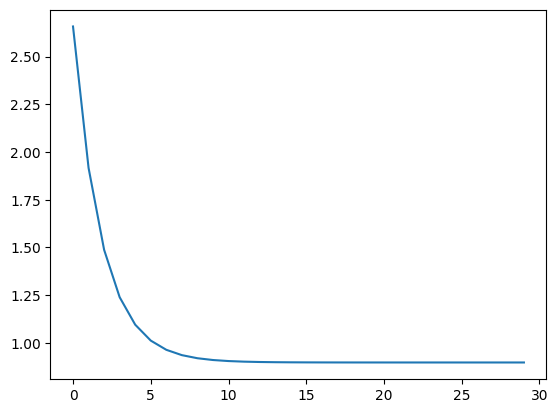

In [9]:
plt.plot(losses)

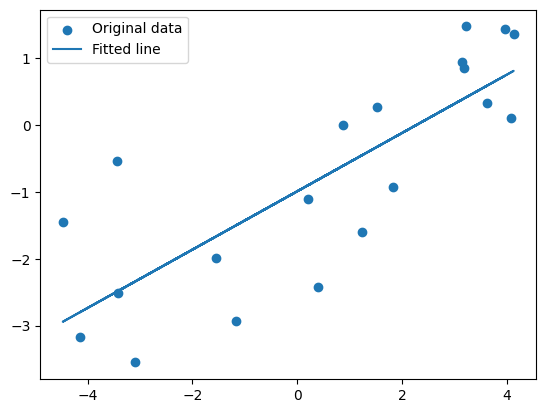

In [10]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label='Original data')
plt.plot(X,predicted,label='Fitted line')
plt.legend()
plt.show()

In [11]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.4359578]] [-0.99052274]
